# Prosper Loan Data Exploration
## <i>by Amarjeet Singh</i>

## Preliminary Wrangling

## Introduction
[Prosper Marketplace, Inc.](https://www.prosper.com/) is a San Francisco, California-based company in the peer-to-peer lending industry. Prosper Funding LLC, one of its subsidiaries, operates Prosper.com, a website where individuals can either invest in personal loans or request to borrow money.
Prosper Marketplace is America's first peer-to-peer lending marketplace, with over \\$7 billion in funded loans. Borrowers request personal loans on Prosper and investors (individual or institutional) can fund anywhere from \\$2,000 to \\$35,000 per loan request. Investors can consider borrowers’ credit scores, ratings, and histories and the category of the loan. Prosper handles the servicing of the loan and collects and distributes borrower payments and interest back to the loan investors.

Prosper verifies borrowers' identities and select personal data before funding loans and manages all stages of loan servicing. Prosper's unsecured personal loans are fully amortized over a period of three or five years, with no pre-payment penalties. Prosper generates revenue by collecting a one-time fee on funded loans from borrowers and assessing an annual loan servicing fee to investors.

This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains the variables in the data set.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('prosperLoanData.csv')

In [3]:
print(df.shape)
print(df.dtypes)
df.head()

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df = df[['ListingKey', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'BorrowerRate', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'DebtToIncomeRatio', 'IncomeRange', 'TotalProsperLoans', 'OnTimeProsperPayments', 'LoanOriginalAmount', 'LoanOriginationQuarter']]

In [5]:
df.head()

,ListingKey,ListingCreationDate,CreditGrade,Term,LoanStatus,BorrowerRate,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),...,ListingCategory (numeric),EmploymentStatus,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,TotalProsperLoans,OnTimeProsperPayments,LoanOriginalAmount,LoanOriginationQuarter
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,C,36,Completed,0.1580,NaN,NaN,NaN,NaN,...,0,Self-employed,640.0,659.0,0.17,"$25,000-49,999",NaN,NaN,9425,Q3 2007
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,NaN,36,Current,0.0920,0.0249,0.05470,6.0,A,...,2,Employed,680.0,699.0,0.18,"$50,000-74,999",NaN,NaN,10000,Q1 2014
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,HR,36,Completed,0.2750,NaN,NaN,NaN,NaN,...,0,Not available,480.0,499.0,0.06,Not displayed,NaN,NaN,3001,Q1 2007
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,NaN,36,Current,0.0974,0.0249,0.06000,6.0,A,...,16,Employed,800.0,819.0,0.15,"$25,000-49,999",NaN,NaN,10000,Q4 2012
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,NaN,36,Current,0.2085,0.0925,0.09066,3.0,D,...,2,Employed,680.0,699.0,0.26,"$100,000+",1.0,11.0,15000,Q3 2013


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
ListingKey                   113937 non-null object
ListingCreationDate          113937 non-null object
CreditGrade                  28953 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerRate                 113937 non-null float64
EstimatedLoss                84853 non-null float64
EstimatedReturn              84853 non-null float64
ProsperRating (numeric)      84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
EmploymentStatus             111682 non-null object
CreditScoreRangeLower        113346 non-null float64
CreditScoreRangeUpper        113346 non-null float64
DebtToIncomeRatio            105383 non-null float64
IncomeRange                  113937 non-null object
Total

In [7]:
# Change datatype of ListingCreationDate to datetime
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])
df['ListingCreationDate'].dtypes

dtype('<M8[ns]')

In [8]:
# Change datatype of LoanOriginationQuarter to categorical
df['LoanOriginationQuarter'] = df['LoanOriginationQuarter'].astype('category')
df['LoanOriginationQuarter'].dtypes

CategoricalDtype(categories=['Q1 2006', 'Q1 2007', 'Q1 2008', 'Q1 2010', 'Q1 2011',
                  'Q1 2012', 'Q1 2013', 'Q1 2014', 'Q2 2006', 'Q2 2007',
                  'Q2 2008', 'Q2 2009', 'Q2 2010', 'Q2 2011', 'Q2 2012',
                  'Q2 2013', 'Q3 2006', 'Q3 2007', 'Q3 2008', 'Q3 2009',
                  'Q3 2010', 'Q3 2011', 'Q3 2012', 'Q3 2013', 'Q4 2005',
                  'Q4 2006', 'Q4 2007', 'Q4 2008', 'Q4 2009', 'Q4 2010',
                  'Q4 2011', 'Q4 2012', 'Q4 2013'],
                 ordered=False)

In [9]:
# Change datatype of ProsperRating (Alpha) to categorical
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype('category')
df['ProsperRating (Alpha)'].dtypes

CategoricalDtype(categories=['A', 'AA', 'B', 'C', 'D', 'E', 'HR'], ordered=False)

In [10]:
# Change datatype of ProsperRating (numeric) to categorical
df['ProsperRating (numeric)'] = df['ProsperRating (numeric)'].astype('category')
df['ProsperRating (numeric)'].dtypes

CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ordered=False)

In [11]:
# Change datatype of EmploymentStatus to categorical
df['EmploymentStatus'] = df['EmploymentStatus'].astype('category')
df['EmploymentStatus'].dtypes

CategoricalDtype(categories=['Employed', 'Full-time', 'Not available', 'Not employed',
                  'Other', 'Part-time', 'Retired', 'Self-employed'],
                 ordered=False)

In [12]:
# Calculate Credit Score from averages of CreditScoreRangeLower and CreditScoreRangeUpper
# and delete these redundant variables
df['CreditScore'] = (df['CreditScoreRangeLower'] + df['CreditScoreRangeUpper'])/2
del df['CreditScoreRangeLower']
del df['CreditScoreRangeUpper']
df.head()

,ListingKey,ListingCreationDate,CreditGrade,Term,LoanStatus,BorrowerRate,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,DebtToIncomeRatio,IncomeRange,TotalProsperLoans,OnTimeProsperPayments,LoanOriginalAmount,LoanOriginationQuarter,CreditScore
0,1021339766868145413AB3B,2007-08-26 19:09:29.263,C,36,Completed,0.1580,NaN,NaN,NaN,NaN,NaN,0,Self-employed,0.17,"$25,000-49,999",NaN,NaN,9425,Q3 2007,649.5
1,10273602499503308B223C1,2014-02-27 08:28:07.900,NaN,36,Current,0.0920,0.0249,0.05470,6.0,A,7.0,2,Employed,0.18,"$50,000-74,999",NaN,NaN,10000,Q1 2014,689.5
2,0EE9337825851032864889A,2007-01-05 15:00:47.090,HR,36,Completed,0.2750,NaN,NaN,NaN,NaN,NaN,0,Not available,0.06,Not displayed,NaN,NaN,3001,Q1 2007,489.5
3,0EF5356002482715299901A,2012-10-22 11:02:35.010,NaN,36,Current,0.0974,0.0249,0.06000,6.0,A,9.0,16,Employed,0.15,"$25,000-49,999",NaN,NaN,10000,Q4 2012,809.5
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097,NaN,36,Current,0.2085,0.0925,0.09066,3.0,D,4.0,2,Employed,0.26,"$100,000+",1.0,11.0,15000,Q3 2013,689.5


### What is the structure of your dataset?
The Prosper loan dataset contains 113,937 observations of total 81 variables. The observations refer to loan listings on Prosper.com from late 2005 until early 2014, and various characteristics of those loans. The data seems “tidy”, so there is not much work required in the way of “tidying” the data.

### What is/are the main feature(s) of interest in your dataset?
It would be interesting to know how have various features varied over time.<br>
Also it would be worth investigating the borrowers' loan statuses, interest rates on their loans, term of loans, prosper scores and credit grades, income ranges and employment statuses, etc.<br>
All of this coupled with the listing category could give some interesting insights.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I would be using the following variables out of the 81 available variables to carry out the investigation:
['CreditGrade', 'Term', 'LoanStatus', 'BorrowerRate', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus', 'CreditScore', 'DebtToIncomeRatio', 'IncomeRange', 'TotalProsperLoans', 'OnTimeProsperPayments', 'LoanOriginalAmount', 'LoanOriginationQuarter']

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [13]:
df['LoanOriginationQuarter'].value_counts()

Q4 2013    14450
Q1 2014    12172
Q3 2013     9180
Q2 2013     7099
Q3 2012     5632
Q2 2012     5061
Q1 2012     4435
Q4 2012     4425
Q2 2008     4344
Q4 2011     3913
Q1 2013     3616
Q3 2008     3602
Q2 2007     3118
Q3 2011     3093
Q1 2007     3079
Q1 2008     3074
Q3 2007     2671
Q4 2007     2592
Q2 2011     2478
Q4 2006     2403
Q3 2006     1934
Q1 2011     1744
Q4 2010     1600
Q2 2010     1539
Q4 2009     1449
Q3 2010     1270
Q2 2006     1254
Q1 2010     1243
Q3 2009      585
Q4 2008      532
Q1 2006      315
Q4 2005       22
Q2 2009       13
Name: LoanOriginationQuarter, dtype: int64

In [14]:
# Order loan origination quarters in chronological order
origination_quarters = ['Q4 2005',
                        'Q1 2006', 'Q2 2006', 'Q3 2006', 'Q4 2006',
                        'Q1 2007', 'Q2 2007', 'Q3 2007', 'Q4 2007',
                        'Q1 2008', 'Q2 2008', 'Q3 2008', 'Q4 2008',
                        'Q1 2009', 'Q2 2009', 'Q3 2009', 'Q4 2009', 
                        'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010',
                        'Q1 2011', 'Q2 2011', 'Q3 2011', 'Q4 2011',
                        'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012',
                        'Q1 2013', 'Q2 2013', 'Q3 2013', 'Q4 2013',
                        'Q1 2014']

pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    quarters = pd.api.types.CategoricalDtype(ordered = True, categories = origination_quarters)
    df['LoanOriginationQuarter'] = df['LoanOriginationQuarter'].astype(quarters)
else: # pre-v0.21
    df['LoanOriginationQuarter'] = df['LoanOriginationQuarter'].astype('category', ordered = True,
                                                                       categories = origination_quarters)

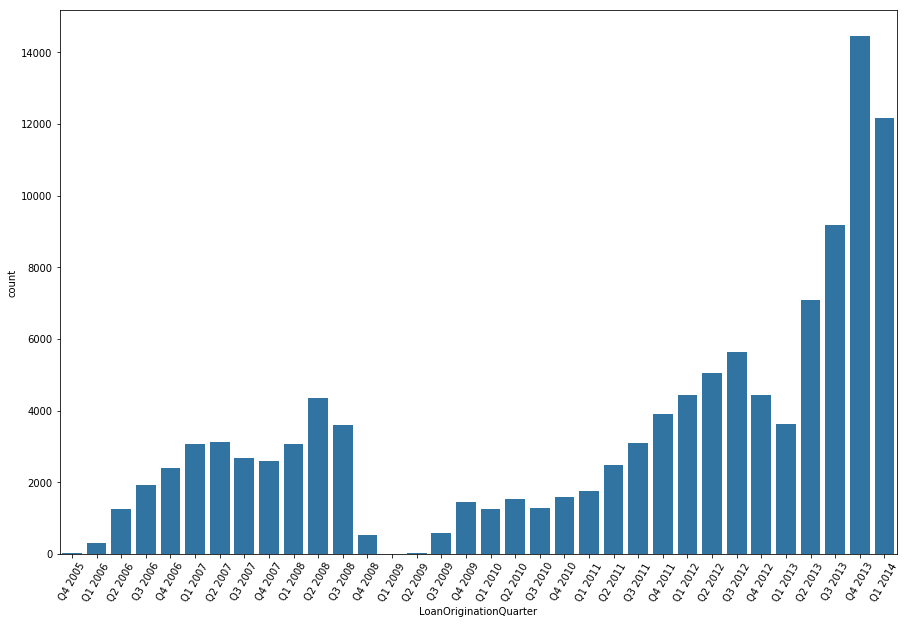

In [15]:
default_color = sns.color_palette()[0]
plt.figure(figsize=(15,10))
ax = sns.countplot(df['LoanOriginationQuarter'], color=default_color)
plt.xticks(rotation = 60)
plt.show()

The visualization shows a big dip in the number of listings from Q4 2008 into 2009-10. Though Prosper is an alternative to the traditional loan models, surprisingly, this time period coincides with the collapse of Lehman Brothers and the resulting fallout in the global financial system indicating that Prosper's business was not immune to the global economic crisis. It took almost four years for listing levels to reach the Q2 2008 levels.

In [16]:
df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

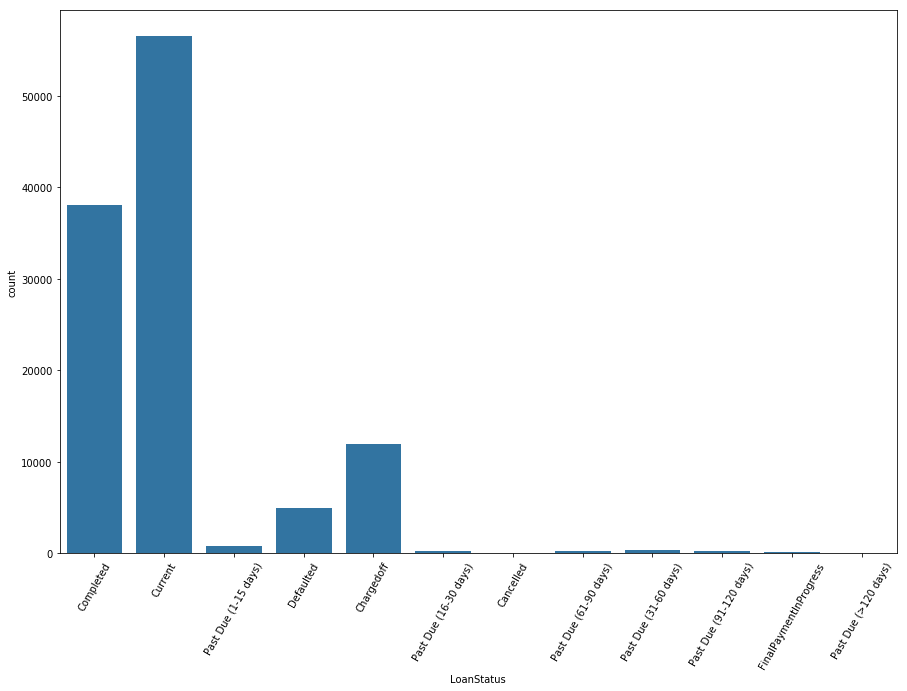

In [17]:
default_color = sns.color_palette()[0]
plt.figure(figsize=(15,10))
ax = sns.countplot(df['LoanStatus'], color=default_color)
plt.xticks(rotation = 60)
plt.show()

Most of the loans are either Completed or Current, there are also a significant number of Charged-off and Defaulted (non-performing) loans.

In [18]:
df['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [19]:
# Order prosper ratings (alpha) HR to AA
prosper_ratings_alpha = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']

pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    alpha_ratings = pd.api.types.CategoricalDtype(ordered = True, categories = prosper_ratings_alpha)
    df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(alpha_ratings)
else: # pre-v0.21
    df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype('category', ordered = True,
                                                                      categories = prosper_ratings_alpha)

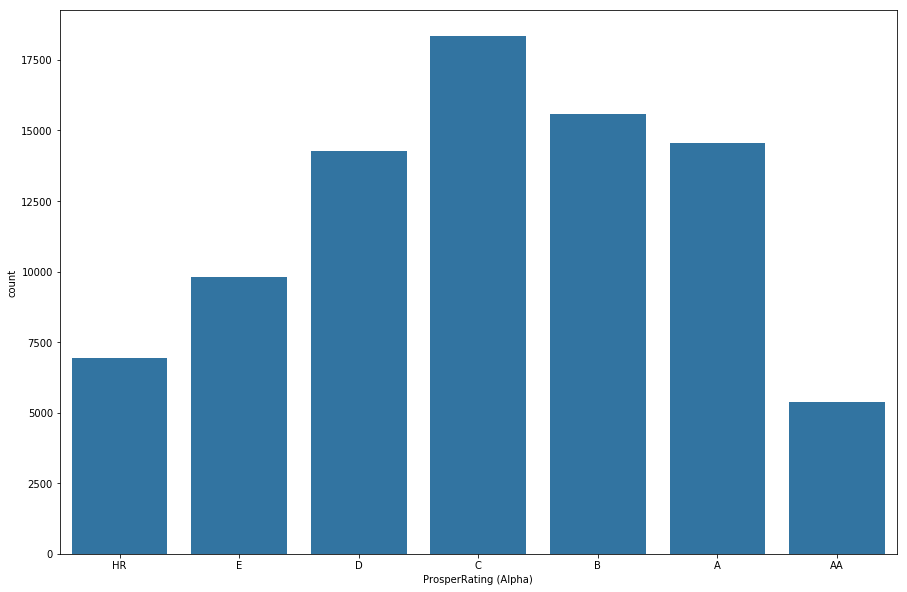

In [20]:
default_color = sns.color_palette()[0]
plt.figure(figsize=(15,10))
ax = sns.countplot(df['ProsperRating (Alpha)'], color=default_color)
plt.show()

Most of the borrowers were assigned a alpha prosper rating of C at the time the listing was created.

In [21]:
df['ProsperRating (numeric)'].value_counts()

4.0    18345
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRating (numeric), dtype: int64

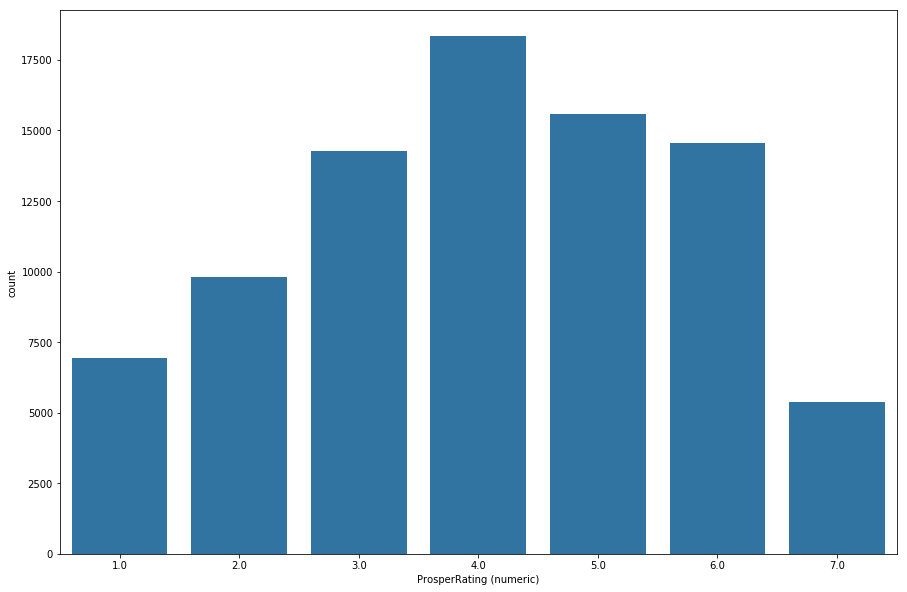

In [22]:
default_color = sns.color_palette()[0]
plt.figure(figsize=(15,10))
ax = sns.countplot(df['ProsperRating (numeric)'], color=default_color)
plt.show()

This also matches with what was observed above.

In [23]:
df['CreditGrade'].value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [24]:
# Order credit grades NC to AA
credit_grades = ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']

pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    grades = pd.api.types.CategoricalDtype(ordered = True, categories = credit_grades)
    df['CreditGrade'] = df['CreditGrade'].astype(grades)
else: # pre-v0.21
    df['CreditGrade'] = df['CreditGrade'].astype('category', ordered = True,
                                                                      categories = credit_grades)

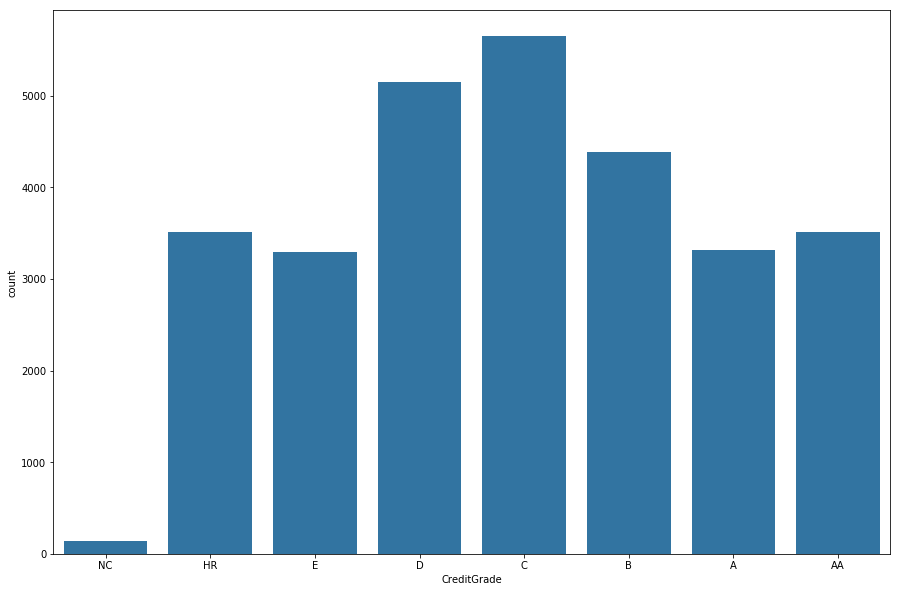

In [25]:
default_color = sns.color_palette()[0]
plt.figure(figsize=(15,10))
ax = sns.countplot(df['CreditGrade'], color=default_color)
plt.show()

Most of the borrowers were assigned a credit grade also of C at the time the listing was created. The count for NC(no credit) is very low.

In [26]:
df['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [27]:
# Change listing category from numeric to their corresponding labels
ListingCategoryLabels = ['Not Available',
                         'Debt Consolidation',
                         'Home Improvement',
                         'Business',
                         'Personal Loan',
                         'Student Use',
                         'Auto',
                         'Other', 
                         'Baby&Adoption',
                         'Boat',
                         'Cosmetic Procedure',
                         'Engagement Ring',
                         'Green Loans',
                         'Household Expenses',
                         'Large Purchases',
                         'Medical/Dental',
                         'Motorcycle',
                         'RV',
                         'Taxes',
                         'Vacation',
                         'Wedding Loans']


for i in range(21):
    df.loc[df['ListingCategory (numeric)'] == i, 'ListingCategory (numeric)'] = ListingCategoryLabels[i]

In [28]:
df['ListingCategory (numeric)'].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory (numeric), dtype: int64

In [29]:
# Change dataype of listing category to categorical
df['ListingCategory (numeric)'] = df['ListingCategory (numeric)'].astype('category')
df['ListingCategory (numeric)'].dtypes

CategoricalDtype(categories=['Auto', 'Baby&Adoption', 'Boat', 'Business',
                  'Cosmetic Procedure', 'Debt Consolidation',
                  'Engagement Ring', 'Green Loans', 'Home Improvement',
                  'Household Expenses', 'Large Purchases', 'Medical/Dental',
                  'Motorcycle', 'Not Available', 'Other', 'Personal Loan',
                  'RV', 'Student Use', 'Taxes', 'Vacation', 'Wedding Loans'],
                 ordered=False)

In [30]:
# Rename ListingCategory (numeric) variable to ListingCategory
df.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 20 columns):
ListingKey                 113937 non-null object
ListingCreationDate        113937 non-null datetime64[ns]
CreditGrade                28953 non-null category
Term                       113937 non-null int64
LoanStatus                 113937 non-null object
BorrowerRate               113937 non-null float64
EstimatedLoss              84853 non-null float64
EstimatedReturn            84853 non-null float64
ProsperRating (numeric)    84853 non-null category
ProsperRating (Alpha)      84853 non-null category
ProsperScore               84853 non-null float64
ListingCategory            113937 non-null category
EmploymentStatus           111682 non-null category
DebtToIncomeRatio          105383 non-null float64
IncomeRange                113937 non-null object
TotalProsperLoans          22085 non-null float64
OnTimeProsperPayments      22085 non-null float64
LoanOriginalAmount     

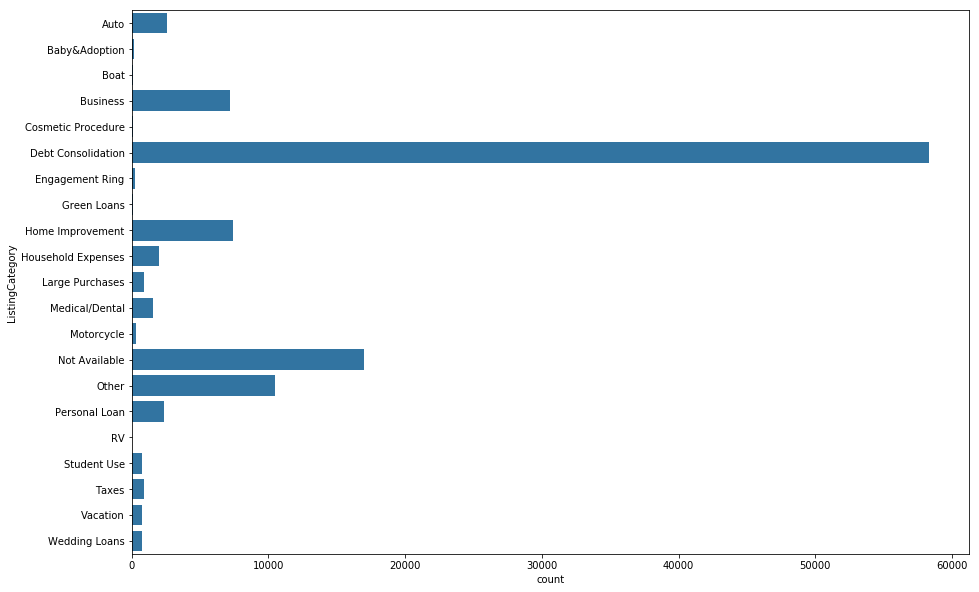

In [31]:
default_color = sns.color_palette()[0]
plt.figure(figsize=(15,10))
ax = sns.countplot(y='ListingCategory', data=df, color=default_color)
plt.show()

It's observed that most of the loans are for Debt Consolidation purpose.

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


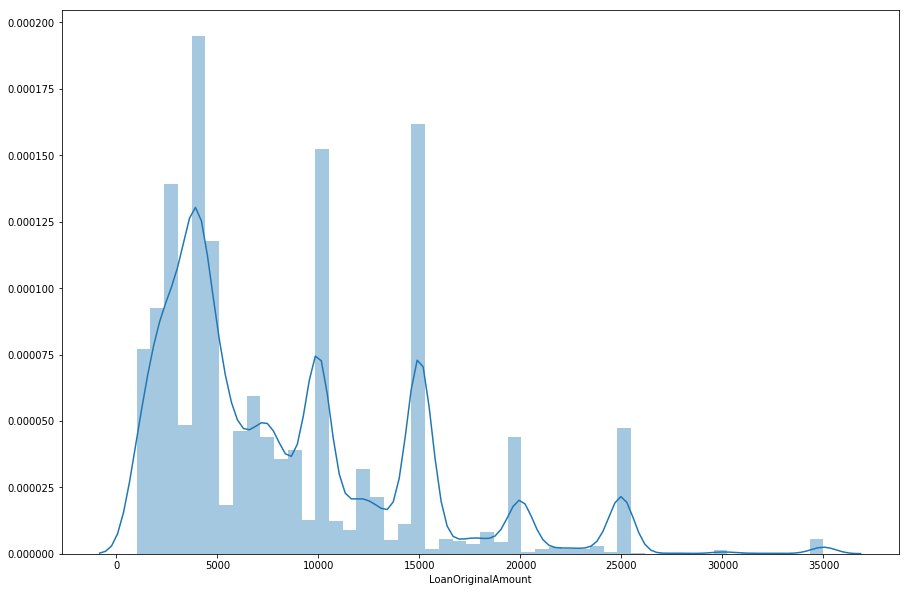

In [32]:
plt.figure(figsize=(15,10))
ax = sns.distplot(df['LoanOriginalAmount'])
plt.show()

In [33]:
df['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

The loan amounts skew relatively small, with the median of \\$6,500 and the mean of \\$8,337.

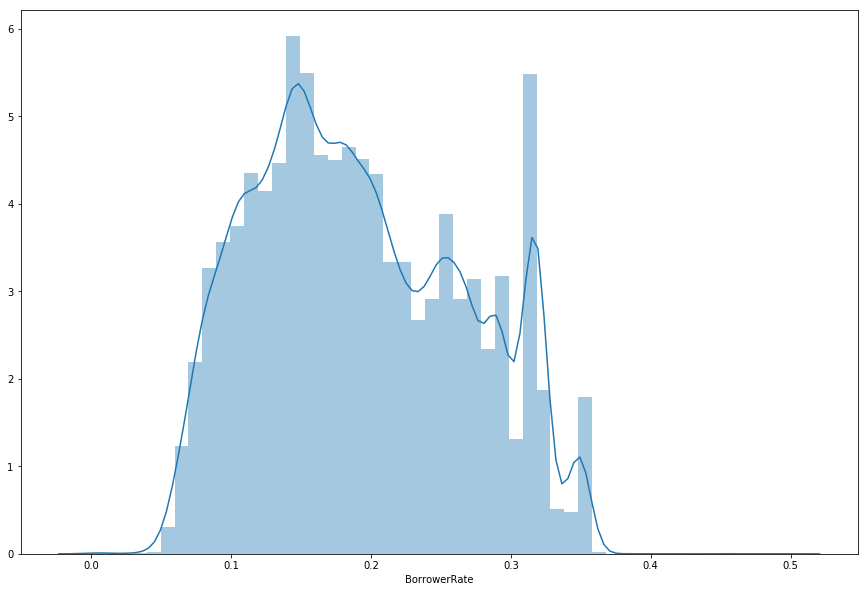

In [34]:
plt.figure(figsize=(15,10))
ax = sns.distplot(df['BorrowerRate'])
plt.show()

In [35]:
df['BorrowerRate'].describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

Interest rates are relatively high with an average of 19.28%. There are also spikes at higher interest rates over 30%. As most of these listings are for debt consolidation, these high interest rates might still be better than the interest rates the borrowers would have to pay for old debts.

In [36]:
df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

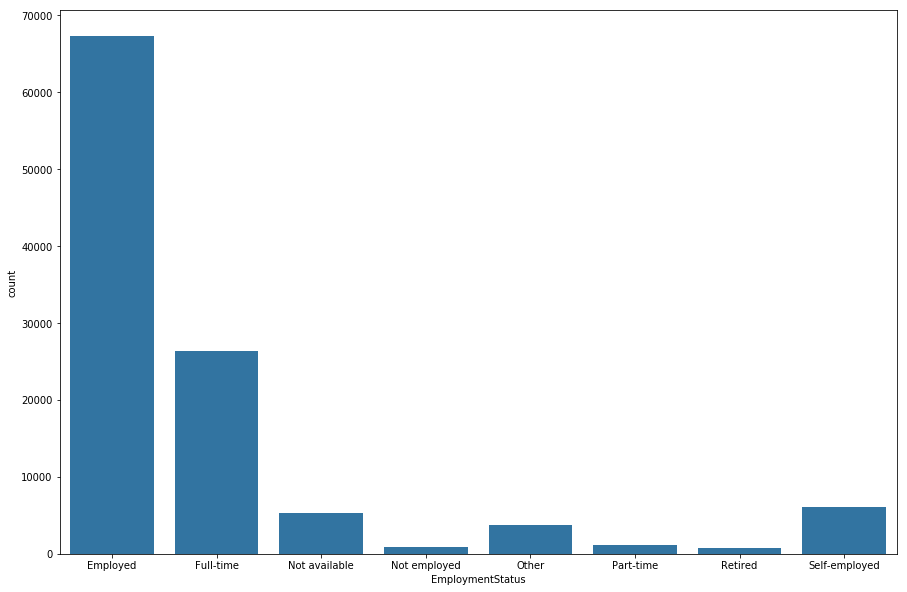

In [37]:
default_color = sns.color_palette()[0]
plt.figure(figsize=(15,10))
ax = sns.countplot(df['EmploymentStatus'], color=default_color)
plt.show()

It can be seen that most of the borrowers are employed.

In [38]:
df['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [39]:
# Order income ranges in meaningful order
income_ranges = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed']

pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    ranges = pd.api.types.CategoricalDtype(ordered = True, categories = income_ranges)
    df['IncomeRange'] = df['IncomeRange'].astype(ranges)
else: # pre-v0.21
    df['IncomeRange'] = df['IncomeRange'].astype('category', ordered = True,
                                                                      categories = income_ranges)

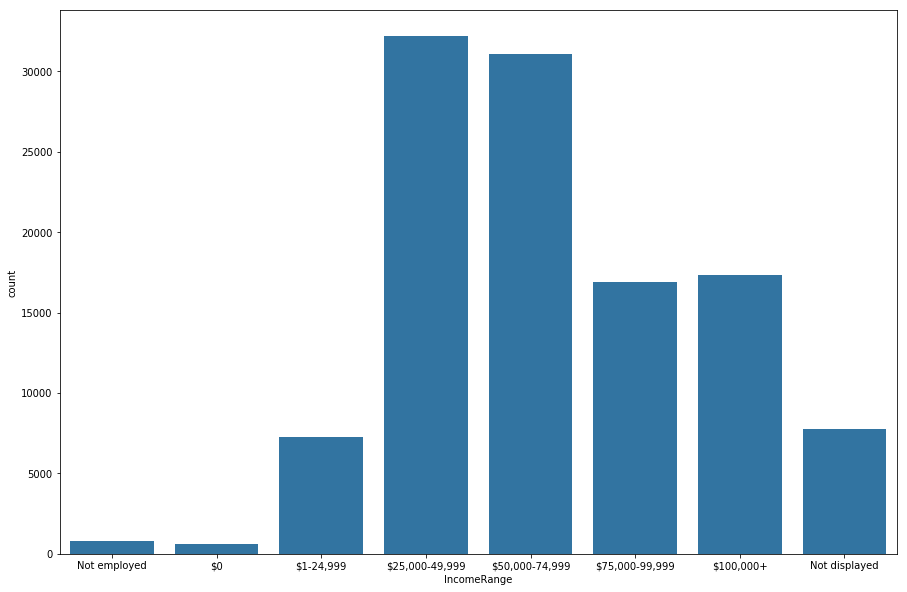

In [40]:
default_color = sns.color_palette()[0]
plt.figure(figsize=(15,10))
ax = sns.countplot(df['IncomeRange'], color=default_color)
plt.show()

Most of the borrowers earn less than \\$75,000 per year which can be an explanation why most of the loans are for debt consolidation purposes.

In [41]:
df['DebtToIncomeRatio'].isna().sum()

8554

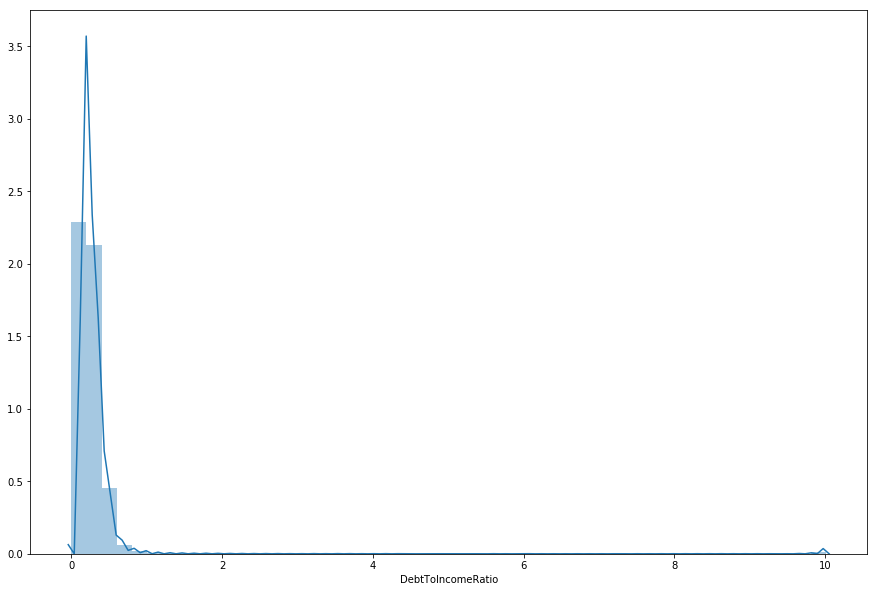

In [42]:
plt.figure(figsize=(15,10))
# .dropna() to resolve the error 'cannot convert float NaN to integer' because of missing values in 'DebtToIncomeRatio'
ax = sns.distplot(df['DebtToIncomeRatio'].dropna())
plt.show()

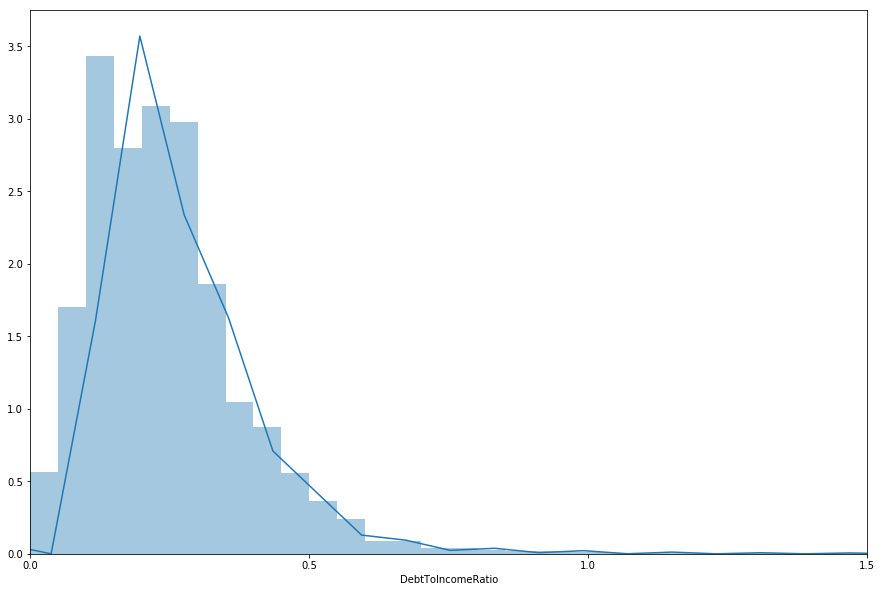

In [43]:
# Remove the outliers
plt.figure(figsize=(15,10))
bins = np.arange(0, df['DebtToIncomeRatio'].max()+0.05, 0.05)
ax = sns.distplot(df['DebtToIncomeRatio'].dropna(), bins=bins)
plt.xlim([0, 1.5])
plt.xticks([0, 0.5, 1.0, 1.5])
plt.show()

In [44]:
df['DebtToIncomeRatio'].describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

Majority of DebtToIncomeRatio are less than 0.5. The data for this variable is slightly skewed to the left.

In [45]:
df['CreditScore'].isna().sum()

591

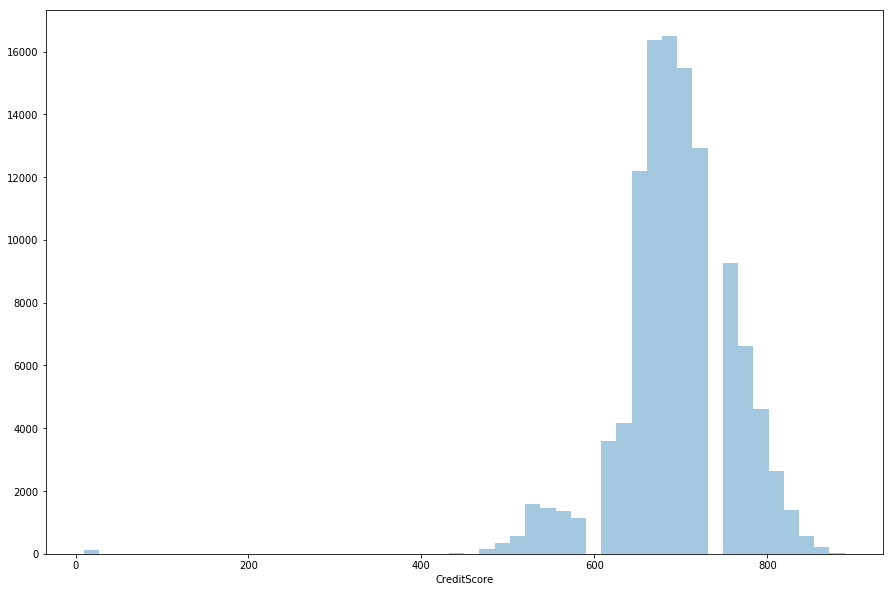

In [46]:
plt.figure(figsize=(15,10))
# .dropna() to resolve the error 'cannot convert float NaN to integer' because of missing values in 'DebtToIncomeRatio'
ax = sns.distplot(df['CreditScore'].dropna(), kde=False)
plt.show()

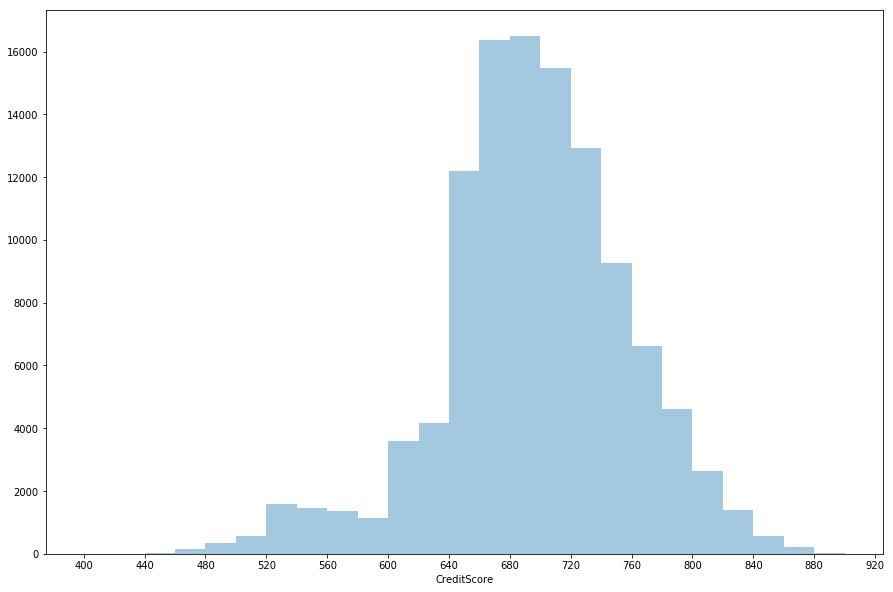

In [47]:
# Remove the outliers
plt.figure(figsize=(15,10))
bins = np.arange(400, df['CreditScore'].max()+ 20, 20)
ax = sns.distplot(df['CreditScore'].dropna(), bins=bins, kde=False)
plt.xticks([400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800, 840, 880, 920])
plt.show()

In [48]:
df['CreditScore'].describe()

count    113346.000000
mean        695.067731
std          66.458275
min           9.500000
25%         669.500000
50%         689.500000
75%         729.500000
max         889.500000
Name: CreditScore, dtype: float64

The credit scores are normally distributed with a mean of 695.

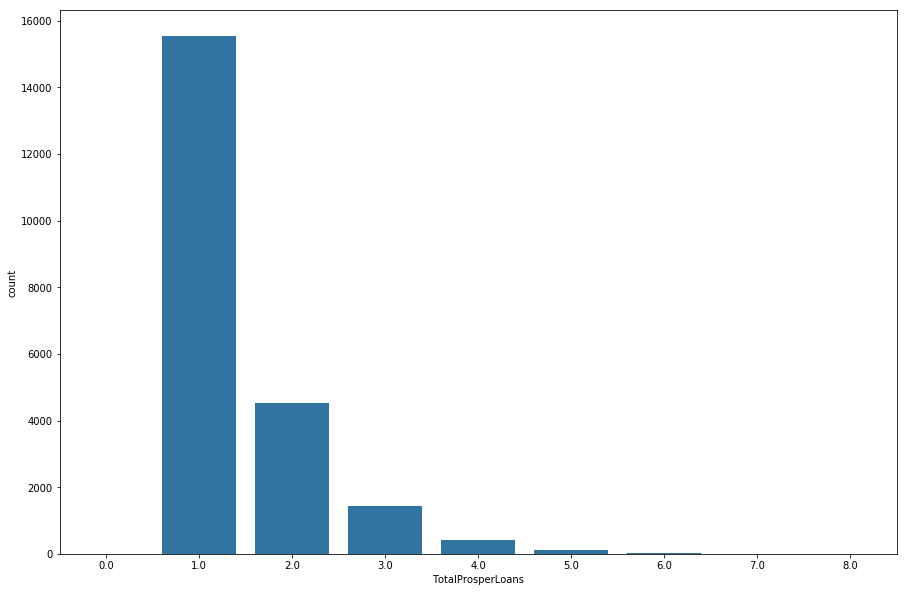

In [49]:
default_color = sns.color_palette()[0]
plt.figure(figsize=(15,10))
ax = sns.countplot(df['TotalProsperLoans'], color=default_color)
plt.show()

A significant number of borrowers are on their second or third loan with Prosper at the time of listing.

In [50]:
df['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

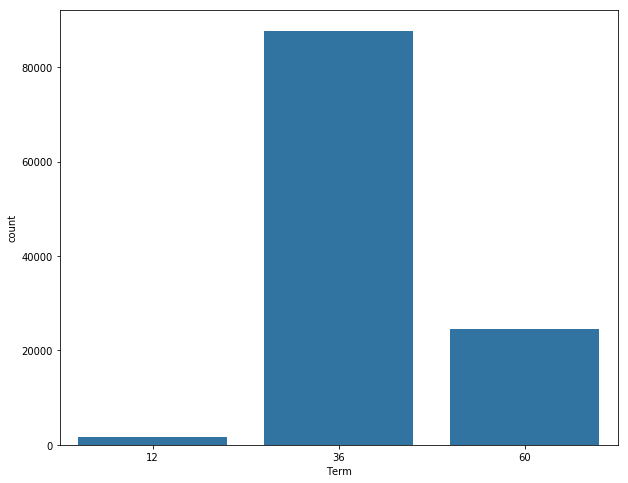

In [51]:
default_color = sns.color_palette()[0]
plt.figure(figsize=(10,8))
ax = sns.countplot(df['Term'], color=default_color)
plt.show()

Majority of loan term is 36 months.

In [52]:
df['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

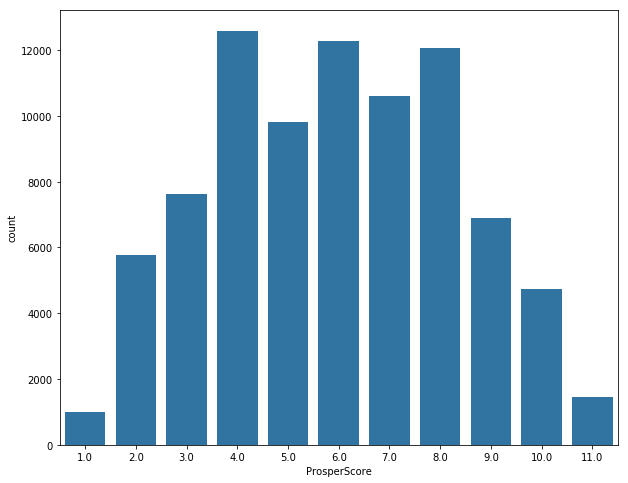

In [53]:
default_color = sns.color_palette()[0]
plt.figure(figsize=(10,8))
ax = sns.countplot(df['ProsperScore'], color=default_color)
plt.show()

The prosper scores of the borrowers seems to be normally distributed with least number of borrowers with the highest and lowest risk scores.

In [54]:
df.describe()

,Term,BorrowerRate,EstimatedLoss,EstimatedReturn,ProsperScore,DebtToIncomeRatio,TotalProsperLoans,OnTimeProsperPayments,LoanOriginalAmount,CreditScore
count,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,105383.000000,22085.000000,22085.000000,113937.00000,113346.000000
mean,40.830248,0.192764,0.080306,0.096068,5.950067,0.275947,1.421100,22.271949,8337.01385,695.067731
std,10.436212,0.074818,0.046764,0.030403,2.376501,0.551759,0.764042,18.830425,6245.80058,66.458275
min,12.000000,0.000000,0.004900,-0.182700,1.000000,0.000000,0.000000,0.000000,1000.00000,9.500000
25%,36.000000,0.134000,0.042400,0.074080,4.000000,0.140000,1.000000,9.000000,4000.00000,669.500000
50%,36.000000,0.184000,0.072400,0.091700,6.000000,0.220000,1.000000,15.000000,6500.00000,689.500000
75%,36.000000,0.250000,0.112000,0.116600,8.000000,0.320000,2.000000,32.000000,12000.00000,729.500000
max,60.000000,0.497500,0.366000,0.283700,11.000000,10.010000,8.000000,141.000000,35000.00000,889.500000


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The visualization of Loan Origination Quarter shows a big dip in listings from Q4 2008 into 2009-10 which can be explained as this time period coincides with the collapse of Lehman Brothers and the resulting fallout in the global financial system.<br>
I created a new variable 'CreditScore' from the average of 'CreditScoreRangeLower' and 'CreditScoreRangeUpper' variables.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
The main “unusual” distribution that stood out was the number of loans originated in each quarter, and how that number dipped to zero in early 2009.<br>
There was need to change the data types of some of the variables as well as replace the listing category numbers with their equivalent labels.<br>
Also i re-ordered default factor levels so that they make more intuitive sense when displayed in a visualization. For example, Loan Origination Quarter should be displayed in chronological order, and Prosper rating levels should show in order from most risky to least risky.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [55]:
df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [56]:
# Create a new column LoanPerformance
df['LoanPerformance'] = df['LoanStatus']

# Replace the Chargedoff and Defaulted with NonPerforming in the LoanPerformance variable
df['LoanPerformance'].replace('Chargedoff', 'NonPerforming', inplace=True)
df['LoanPerformance'].replace('Defaulted', 'NonPerforming', inplace=True)

# Replace all other with Performing in the LoanPerformance variable
df['LoanPerformance'].replace('Current', 'Performing', inplace=True)
df['LoanPerformance'].replace('Completed', 'Performing', inplace=True)
df['LoanPerformance'].replace('Past Due (1-15 days)', 'Performing', inplace=True)
df['LoanPerformance'].replace('Past Due (31-60 days)', 'Performing', inplace=True)
df['LoanPerformance'].replace('Past Due (61-90 days)', 'Performing', inplace=True)
df['LoanPerformance'].replace('Past Due (91-120 days)', 'Performing', inplace=True)
df['LoanPerformance'].replace('Past Due (16-30 days)', 'Performing', inplace=True)
df['LoanPerformance'].replace('FinalPaymentInProgress', 'Performing', inplace=True)
df['LoanPerformance'].replace('Past Due (>120 days)', 'Performing', inplace=True)
df['LoanPerformance'].replace('Cancelled', 'Performing', inplace=True)

# Change the datatype of LoanPerformance variable
df['LoanPerformance'] = df['LoanPerformance'].astype('category')
print(df['LoanPerformance'].dtypes)
print(df['LoanPerformance'].value_counts())

category
Performing       96927
NonPerforming    17010
Name: LoanPerformance, dtype: int64


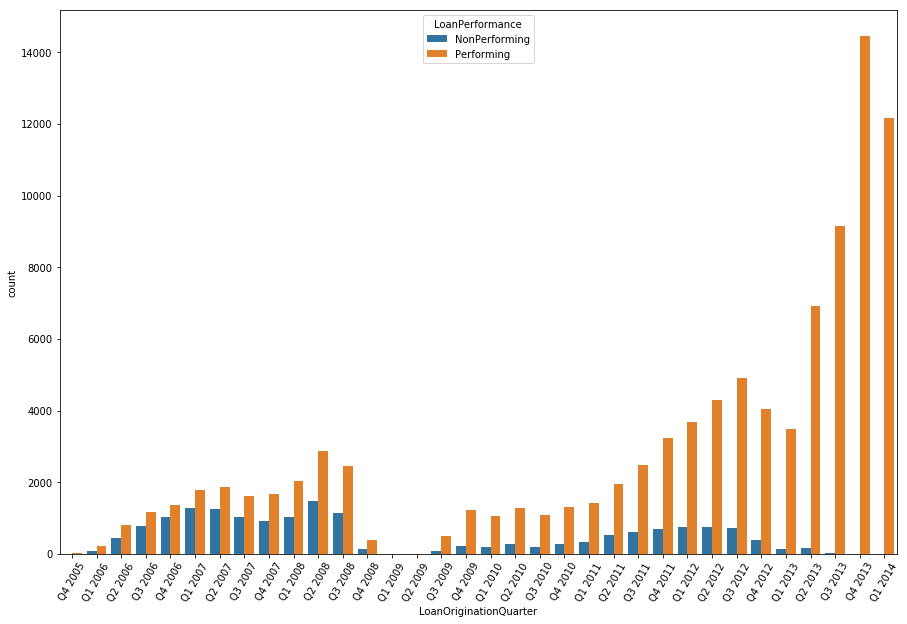

In [57]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='LoanOriginationQuarter', hue='LoanPerformance', data=df)
plt.xticks(rotation=60)
plt.show()

In [58]:
df.groupby(['LoanOriginationQuarter'])['LoanPerformance'].describe()

,count,freq,top,unique
LoanOriginationQuarter,,,,
Q4 2005,22,22,Performing,1
Q1 2006,315,230,Performing,2
Q2 2006,1254,813,Performing,2
Q3 2006,1934,1165,Performing,2
Q4 2006,2403,1373,Performing,2
Q1 2007,3079,1788,Performing,2
Q2 2007,3118,1853,Performing,2
Q3 2007,2671,1629,Performing,2
Q4 2007,2592,1666,Performing,2


The result shows that starting from Q1 2006, the number of non-perfroming loans went from 85 and rose to a peak of 1,477 in Q2 2008, before dropping until Q1 2009 when Prosper had no listings. After that period, the number of non perfroming loans were much lower as compared to perfroming loans.<br>
The results described here does not take into account the fact that for more recent loans, it can't be stated that whether they will eventually fall under the performing or the non performing category upon maturity. This visualization assumes that all of those loans would eventually perform.

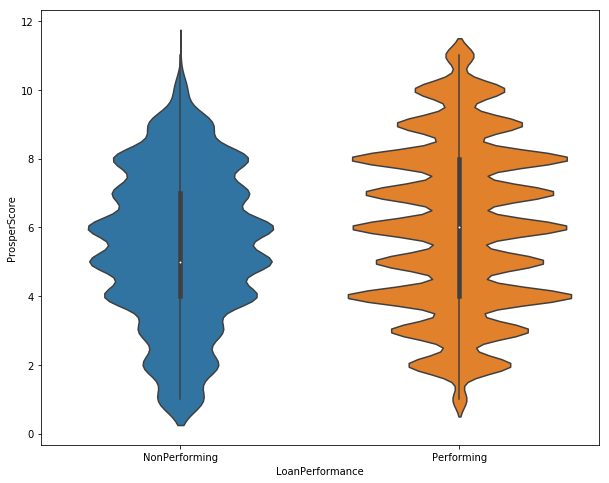

In [59]:
plt.figure(figsize=(10,8))
ax = sns.violinplot(data=df, x='LoanPerformance', y='ProsperScore')
plt.show()

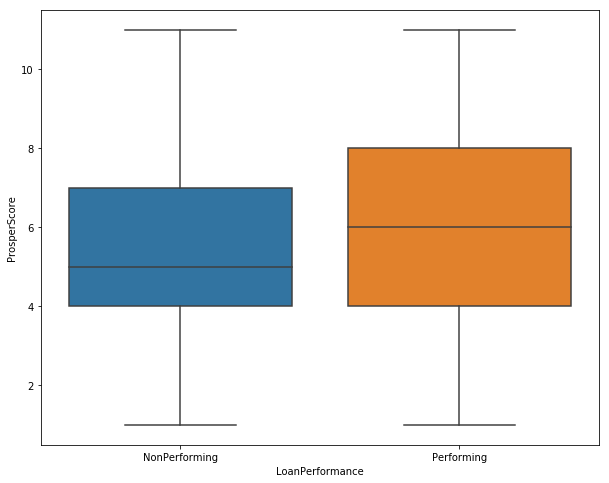

In [60]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=df, x='LoanPerformance', y='ProsperScore')
plt.show()

Non-performing loans have a significantly lower average prosper score than the performing ones.

In [61]:
# Source= https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm
df.groupby('TotalProsperLoans').groups

{0.0: Int64Index([105977], dtype='int64'),
 1.0: Int64Index([     4,     19,     33,     46,     54,     58,     67,     77,
                 78,     82,
             ...
             113855, 113860, 113868, 113869, 113894, 113912, 113915, 113927,
             113930, 113935],
            dtype='int64', length=15538),
 2.0: Int64Index([    61,    124,    127,    150,    189,    218,    343,    361,
                416,    430,
             ...
             113754, 113757, 113762, 113788, 113881, 113886, 113893, 113895,
             113920, 113924],
            dtype='int64', length=4540),
 3.0: Int64Index([    16,     47,     69,    174,    221,    277,    379,    397,
                407,    451,
             ...
             113367, 113443, 113522, 113527, 113540, 113628, 113679, 113813,
             113844, 113933],
            dtype='int64', length=1447),
 4.0: Int64Index([   317,    414,    690,    864,   1133,   1667,   1677,   1780,
               1814,   1972,
             ...


In [62]:
df.groupby('TotalProsperLoans').get_group(0.0)

,ListingKey,ListingCreationDate,CreditGrade,Term,LoanStatus,BorrowerRate,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),...,ListingCategory,EmploymentStatus,DebtToIncomeRatio,IncomeRange,TotalProsperLoans,OnTimeProsperPayments,LoanOriginalAmount,LoanOriginationQuarter,CreditScore,LoanPerformance
105977,BF08350169110478827441B,2010-12-02 20:22:23.610,NaN,36,Completed,0.35,0.183,0.1369,1.0,HR,...,Other,Employed,0.1,"$25,000-49,999",0.0,0.0,4000,Q4 2010,669.5,Performing


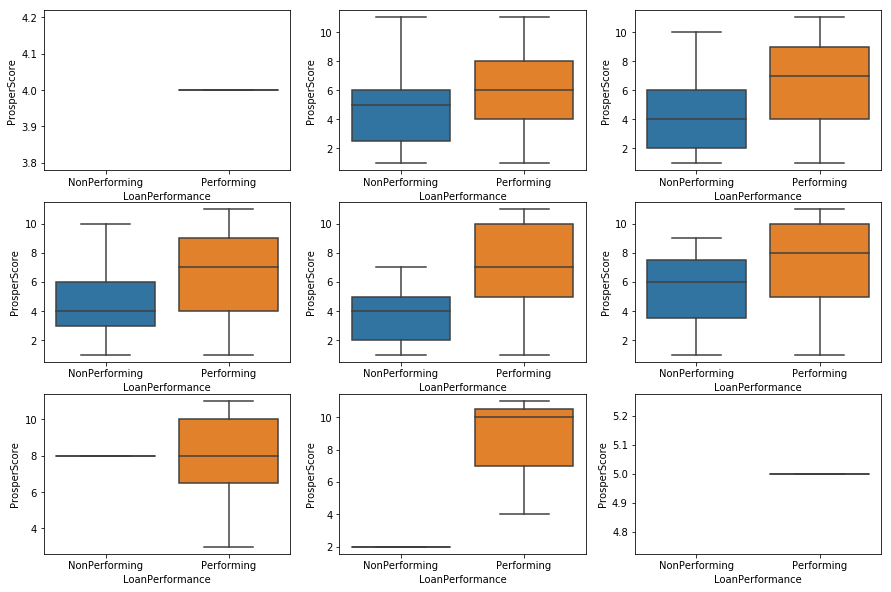

In [63]:
fig, axes = plt.subplots(3, 3, figsize=(15,10))

ax = sns.boxplot(data=df.groupby('TotalProsperLoans').get_group(0.0), x='LoanPerformance', y='ProsperScore', ax=axes[0, 0])
ax = sns.boxplot(data=df.groupby('TotalProsperLoans').get_group(1.0), x='LoanPerformance', y='ProsperScore', ax=axes[0, 1])
ax = sns.boxplot(data=df.groupby('TotalProsperLoans').get_group(2.0), x='LoanPerformance', y='ProsperScore', ax=axes[0, 2])
ax = sns.boxplot(data=df.groupby('TotalProsperLoans').get_group(3.0), x='LoanPerformance', y='ProsperScore', ax=axes[1, 0])
ax = sns.boxplot(data=df.groupby('TotalProsperLoans').get_group(4.0), x='LoanPerformance', y='ProsperScore', ax=axes[1, 1])
ax = sns.boxplot(data=df.groupby('TotalProsperLoans').get_group(5.0), x='LoanPerformance', y='ProsperScore', ax=axes[1, 2])
ax = sns.boxplot(data=df.groupby('TotalProsperLoans').get_group(6.0), x='LoanPerformance', y='ProsperScore', ax=axes[2, 0])
ax = sns.boxplot(data=df.groupby('TotalProsperLoans').get_group(7.0), x='LoanPerformance', y='ProsperScore', ax=axes[2, 1])
ax = sns.boxplot(data=df.groupby('TotalProsperLoans').get_group(8.0), x='LoanPerformance', y='ProsperScore', ax=axes[2, 2])
plt.show()

Non-performing loans consistently have lower prosper scores than performing ones at each level of total prosper loans.

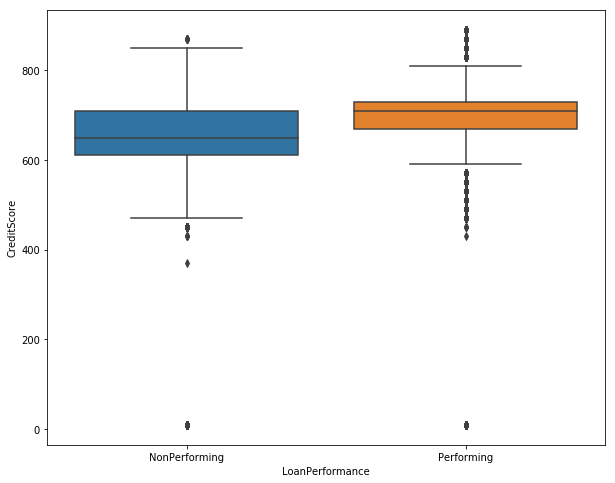

In [64]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=df, x='LoanPerformance', y='CreditScore')
plt.show()

The means are different for credit scores between the performing and non-performing loans. The visualization shows that higher the credit score, the more likely the loan is to perform.

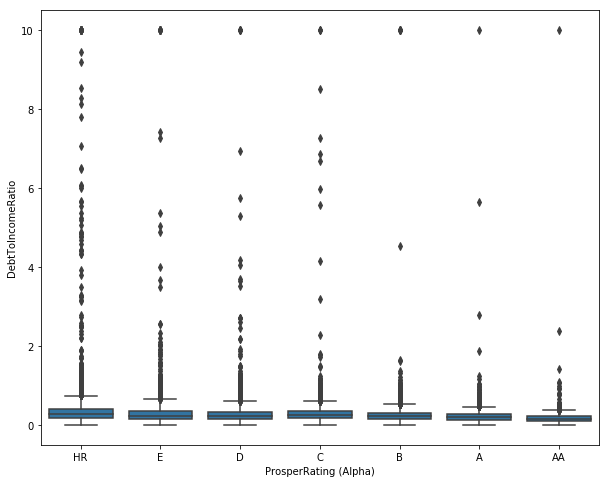

In [65]:
plt.figure(figsize=(10,8))
default_color = sns.color_palette()[0]
ax = sns.boxplot(data=df, x='ProsperRating (Alpha)', y='DebtToIncomeRatio', color=default_color)
plt.show()

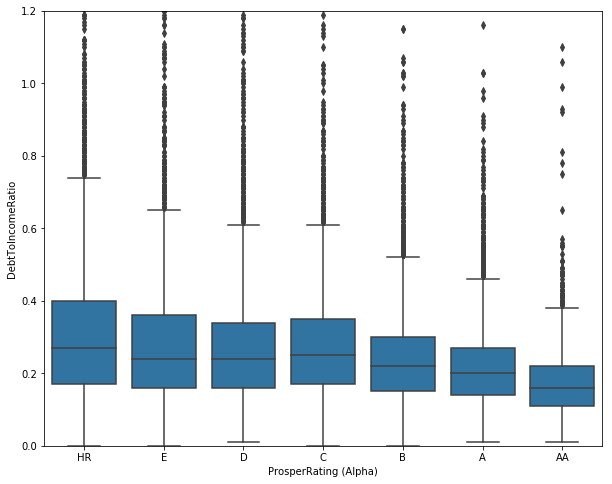

In [66]:
# Remove outliers
plt.figure(figsize=(10,8))
default_color = sns.color_palette()[0]
ax = sns.boxplot(data=df, x='ProsperRating (Alpha)', y='DebtToIncomeRatio', color=default_color)
plt.ylim(0, 1.2)
plt.show()

There appears to be some relationship between lower debt to income ratio and a higher prosper rating, for riskier loans the mean debt to income ratio is roughly the same. There are clearly some other factors influencing the prosper rating.

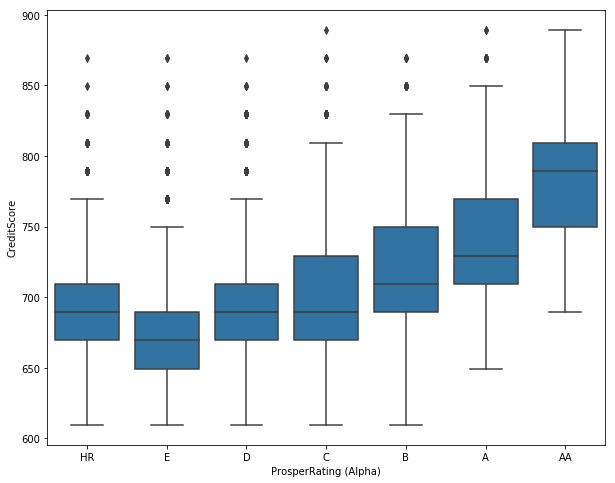

In [67]:
plt.figure(figsize=(10,8))
default_color = sns.color_palette()[0]
ax = sns.boxplot(data=df, x='ProsperRating (Alpha)', y='CreditScore', color=default_color)
plt.show()

Again, at lower-risk Prosper ratings, the mean credit score does appear to be significantly higher than those of higher-risk Prosper ratings. However, with higher-risk Prosper ratings, the credit score does not appear as correlated. HR (“high-risk”) Prosper ratings have higher average credit scores than do the next (less risky) level up, E. So, again, other factors besides just debt to income ratio and credit score factor into the Prosper Rating calculation.<br>
So it can be concluded that though these factors affect prosper ratings but still there are some other factors behind this.

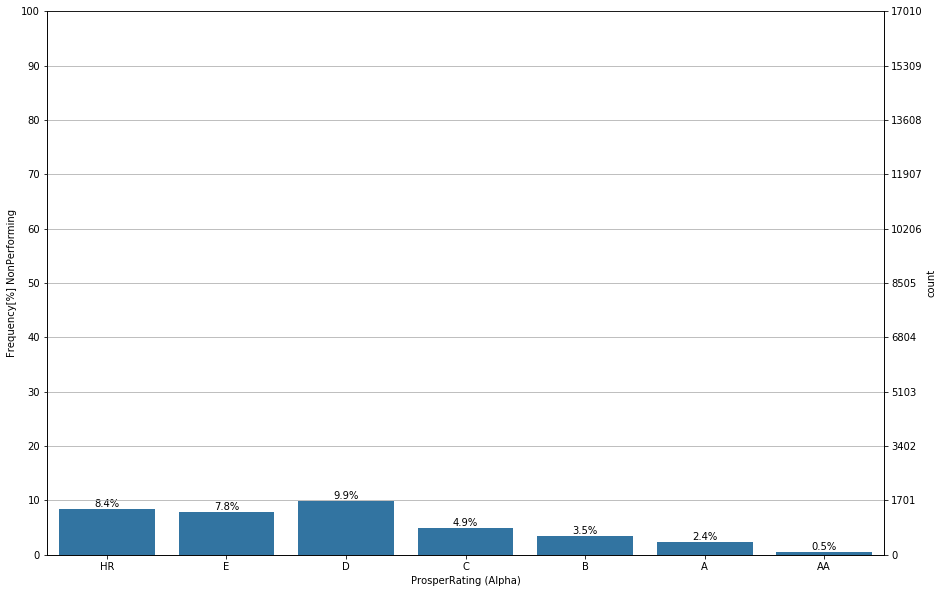

In [68]:
# Source= https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies/33259038

import matplotlib.ticker as ticker

default_color = sns.color_palette()[0]
plt.figure(figsize=(15,10))

ncount = len(df.groupby('LoanPerformance').get_group('NonPerforming'))

ax = sns.countplot(x='ProsperRating (Alpha)', data=df.groupby('LoanPerformance').get_group('NonPerforming'), color=default_color)

# Make twin axis 
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency[%] NonPerforming')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

It can be seen that a risky Prosper rating does correlate to a higher rate of non-performing loans, and less risky ratings show fewer non-performing loans in a stair step way with an exception of a Prosper rating of D.

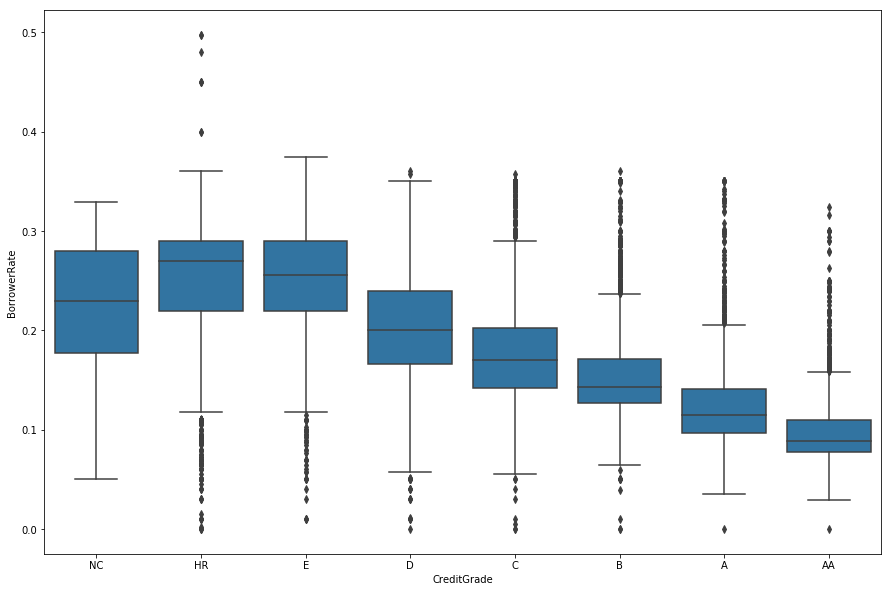

In [69]:
default_color = sns.color_palette()[0]
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=df, x='CreditGrade', y='BorrowerRate', color=default_color)
plt.show()

The mean borrower rate is highest for listings with credit grade of HR and lowest for listings with credit grade of AA.

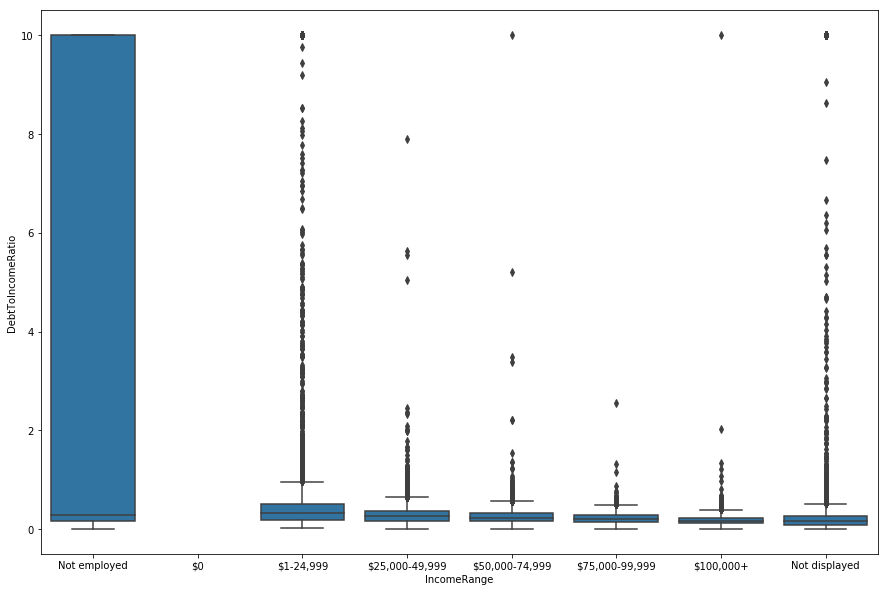

In [70]:
default_color = sns.color_palette()[0]
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=df, x='IncomeRange', y='DebtToIncomeRatio', color=default_color)
plt.show()

As expected, it can be seen that unemployed borrowers' income range is having a very long range of spread for debt to income ratio.

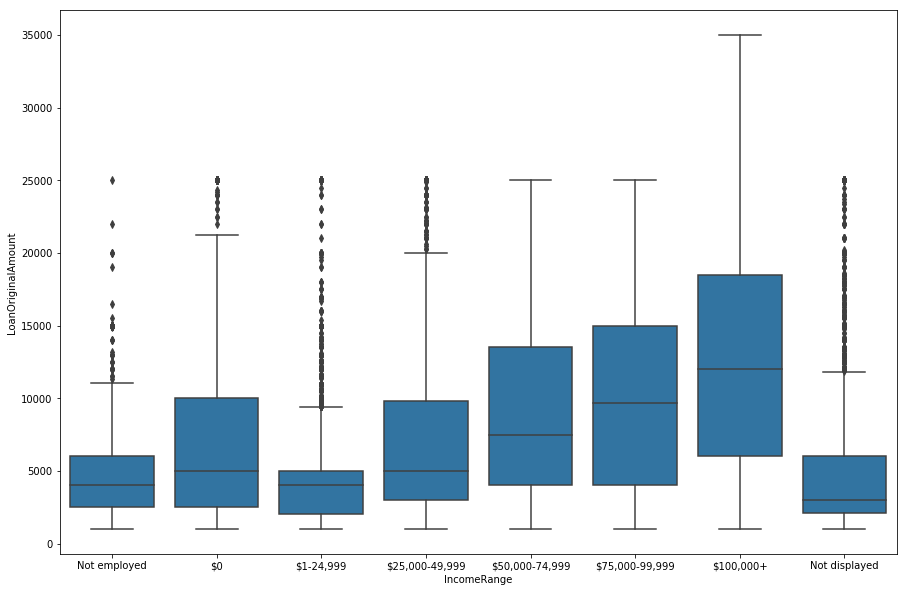

In [71]:
default_color = sns.color_palette()[0]
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=df, x='IncomeRange', y='LoanOriginalAmount', color=default_color)
plt.show()

Borrowers' with income range of \\$100,000+ take huge amounts of loans as compared to borrowers' falling into other income ranges.

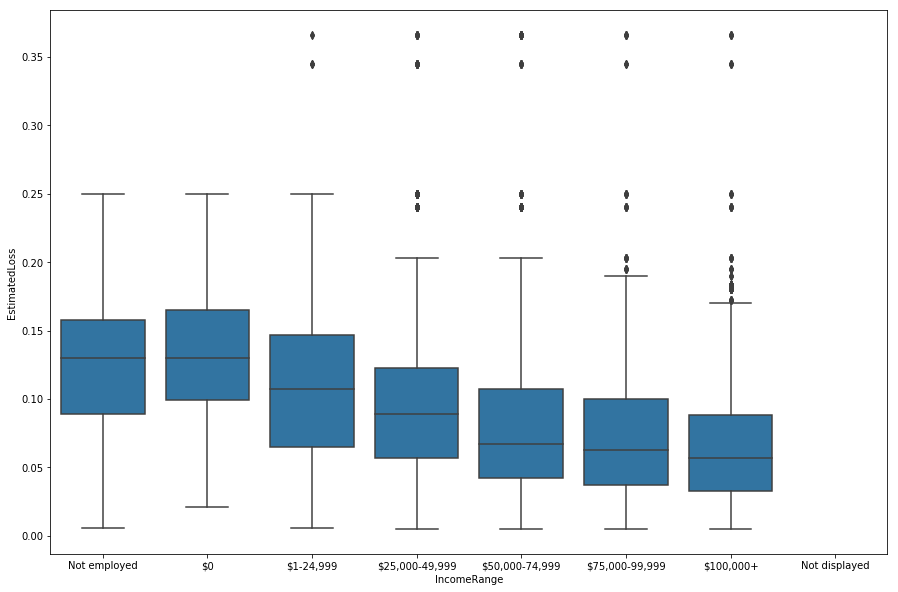

In [72]:
default_color = sns.color_palette()[0]
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=df, x='IncomeRange', y='EstimatedLoss', color=default_color)
plt.show()

As expected, the estimated loss is highest for borrowers' with \\$0 income and those who are unemployed.

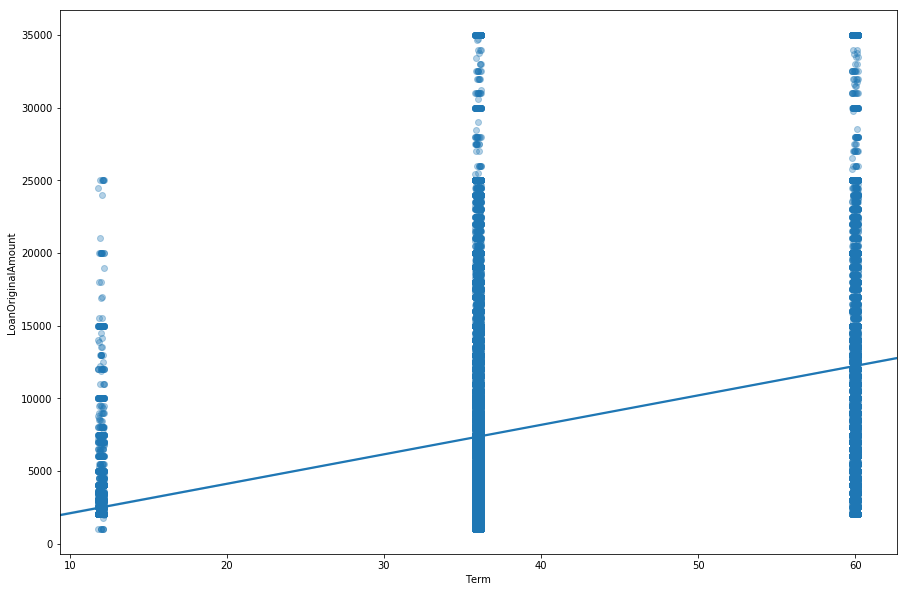

In [73]:
default_color = sns.color_palette()[0]
plt.figure(figsize=(15,10))
ax = sns.regplot(data = df, x = 'Term', y = 'LoanOriginalAmount',
               x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})
plt.show()

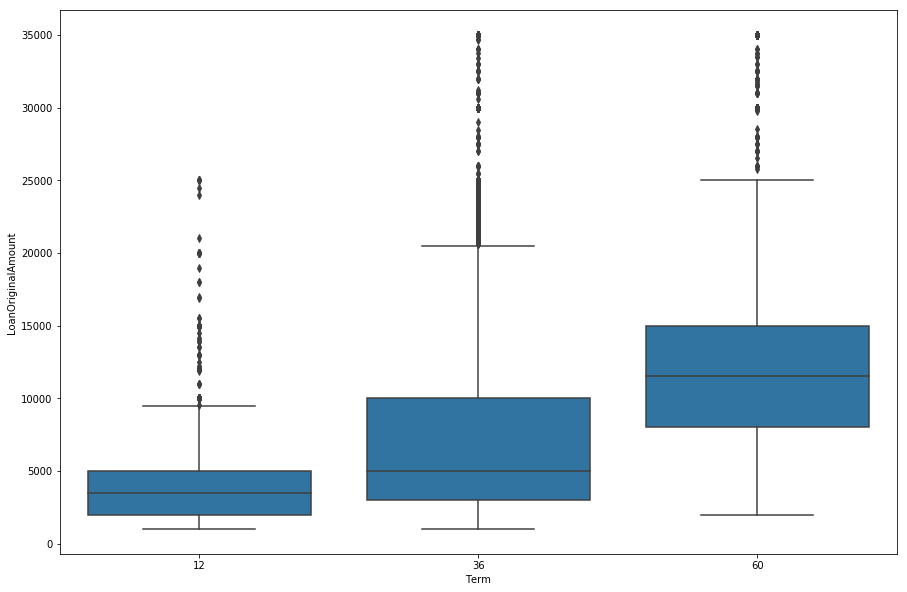

In [74]:
# The above relationship could be better visualized with boxplot rather than scatter plot
default_color = sns.color_palette()[0]
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=df, x='Term', y='LoanOriginalAmount', color=default_color)
plt.show()

Borrowers with loans of term length 60 months seem to be more credit worthy on average.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
We observed that overall there are a huge number of performing loans as compared to non-performing ones at all time periods and this is backed by higher prosper ratings and credit scores for the performing loans. Futhermore it was observed that a risky prosper rating does correlate to a higher number of non performing loans.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
It was seen that borrowers with income range of \\$100,000+ take huge amounts of loans as compared to borrowers falling under other income ranges and the estimated loss is highest for unemployed borrowers.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

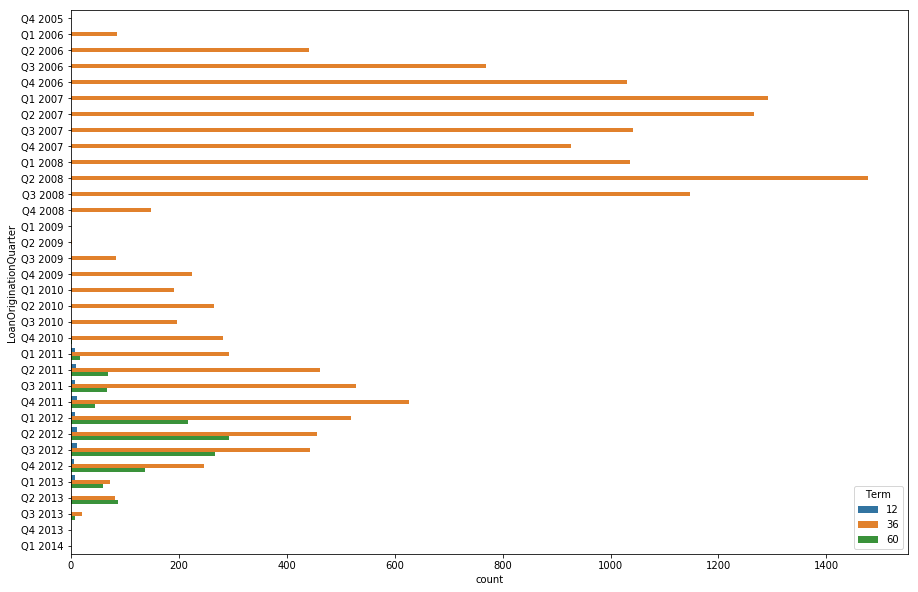

In [75]:
plt.figure(figsize=(15,10))
ax = sns.countplot(data=df.groupby('LoanPerformance').get_group('NonPerforming'), y='LoanOriginationQuarter', hue='Term')
plt.show()

The shorter 12-month terms appear to perform better than their 36-month and 60-month counterparts, at least in the limited data sample that we have. It could be interpretted as with only 12 months of payments, there are fewer things that can go wrong and disrupt a borrower’s income stream therby reducing the chances of the loan not performing.

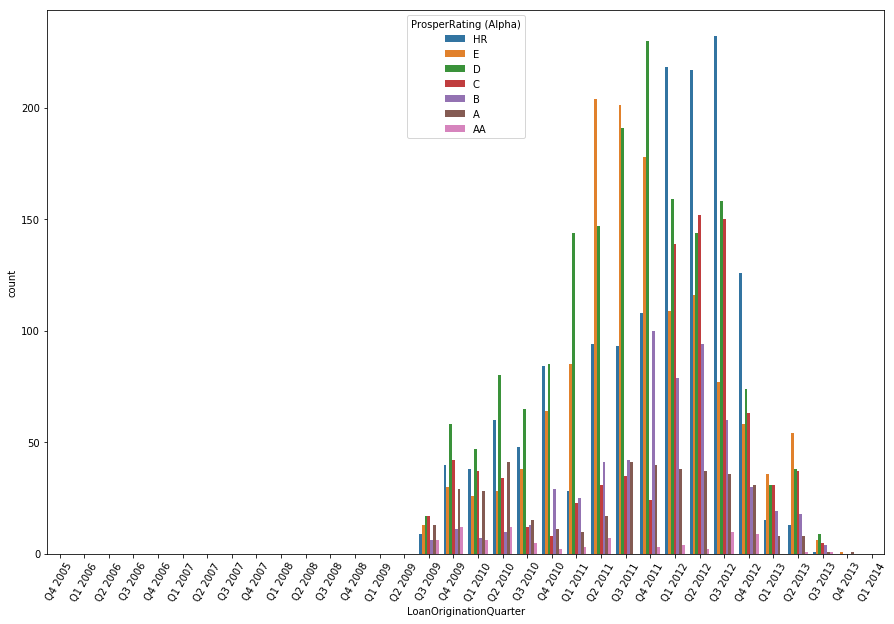

In [76]:
plt.figure(figsize=(15,10))
ax = sns.countplot(data=df.groupby('LoanPerformance').get_group('NonPerforming'), x='LoanOriginationQuarter', hue='ProsperRating (Alpha)')
plt.xticks(rotation=60)
plt.show()

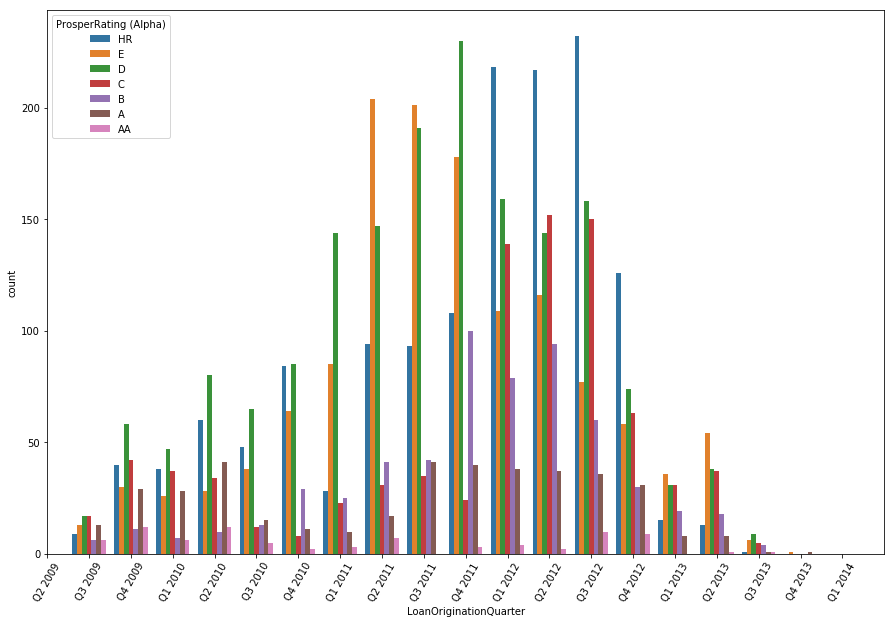

In [77]:
# Zoom in on the required region
plt.figure(figsize=(15,10))
ax = sns.countplot(data=df.groupby('LoanPerformance').get_group('NonPerforming'), x='LoanOriginationQuarter', hue='ProsperRating (Alpha)')
plt.xticks(rotation=60)
plt.xlim(14, 34)
plt.show()

Looking at quarterly loan non-performance by Prosper Rating is illustrative. It's observed that lower-risk loans don’t always outperform their higher-risk counterparts.

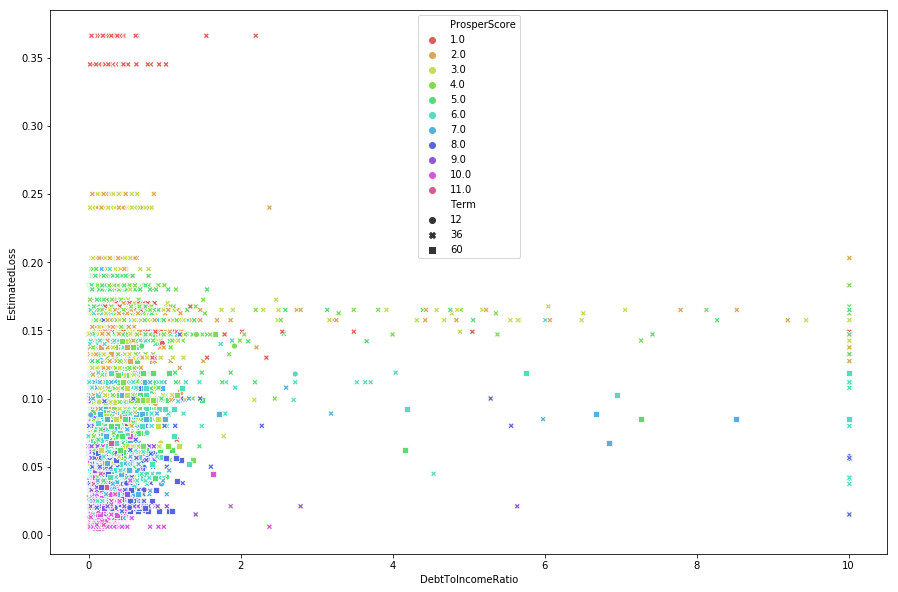

In [78]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(data=df, x='DebtToIncomeRatio', y='EstimatedLoss', hue='ProsperScore', style='Term', palette=sns.hls_palette(11))
plt.show()

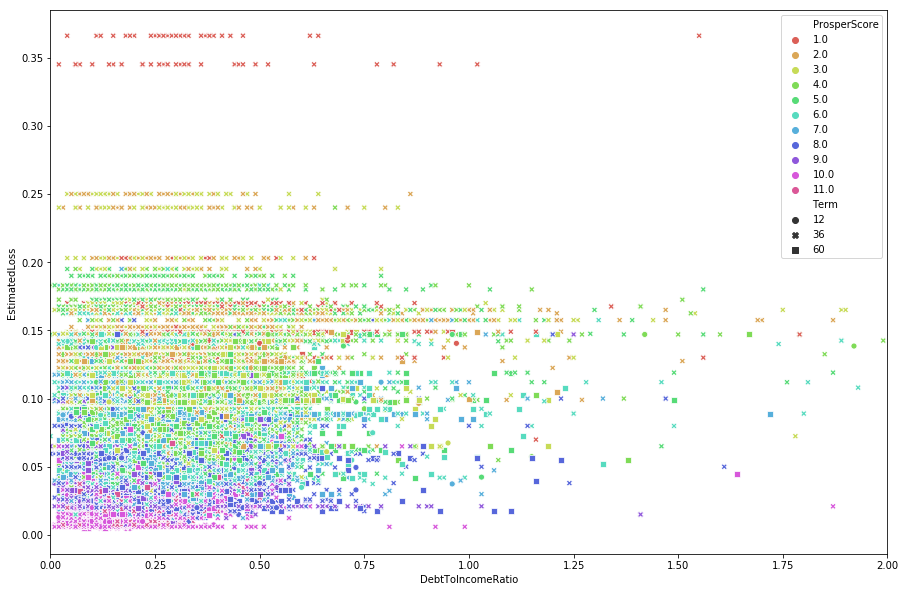

In [79]:
# Remove Outliers
plt.figure(figsize=(15,10))
ax = sns.scatterplot(data=df, x='DebtToIncomeRatio', y='EstimatedLoss', hue='ProsperScore', style='Term', palette=sns.hls_palette(11))
plt.xlim(0, 2)
plt.show()

This is a scatter plot of Estimated Loss and the debt to income ratio of the borrower, with the colors describing the Prosper Score and the shapes describing the term of a particular loan.
If the estimated loss and debt to income ration are low, the prosper score lies on the lowest risk side and this effect is even more pronounced for loans of term length 36 months.

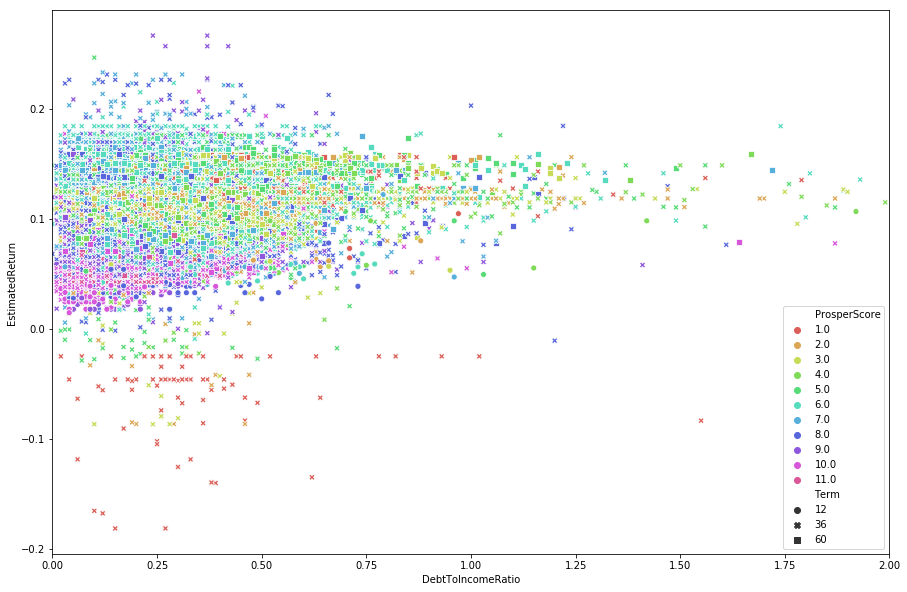

In [80]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(data=df, x='DebtToIncomeRatio', y='EstimatedReturn', hue='ProsperScore', style='Term', palette=sns.hls_palette(11))
plt.xlim(0, 2)
plt.show()

This is a scatter plot of Estimated Return and the debt to income ratio of the borrower, with the colors describing the Prosper Score and the shapes describing the term of a particular loan.
Prosper Score is better i.e, on low risk side for low DebtToIncome ratio given Estimted Return is higher and this is even more pronounced for loans of term length 12 months.

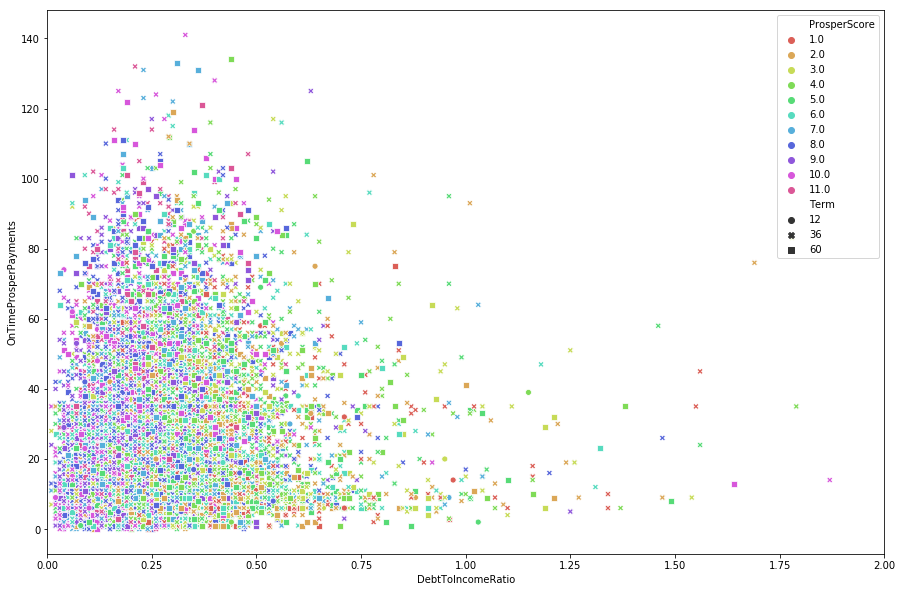

In [81]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(data=df, x='DebtToIncomeRatio', y='OnTimeProsperPayments', hue='ProsperScore', style='Term', palette=sns.hls_palette(11))
plt.xlim(0, 2)
plt.show()

This is a scatter plot of on time prosper payments and the debt to income ratio of the borrower, with the colors describing the Prosper Score and the shapes describing the term of a particular loan.
Prosper Score is high for low debt to income ratio given that borrower has no prior loans or less no. of loans undertaken at listing
time and if taken they be of term length 36 months for this observation to be more pronounced.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
I was able to illustrate that 12 month term loans perform better than its other counterparts and that lower risk loans don't always outperform their higher risk counterparts when it comes to falling under the performing category.<br>
It was observed that if the estimated loss and debt to income ration are low, the prosper score lies on the lowest risk side and the prosper score lies on the lowest risk side also when debt to income ratio is low given that estimated return is high.

### Were there any interesting or surprising interactions between features?
I think it was interesting to notice that loan performance is a little more volatile on a quarterly basis than it is overall as HR loans show the most defaults and charge-offs overall, however, from quarter to quarter, E-, D-, or even B-rated loans sometimes perform worse that the HR loans.